Primeiros dados
   num-pregnant  glucose  diastolic  triceps-skin  insulin  body-mass  \
0             6      148         72            35        0       33.6   
1             1       85         66            29        0       26.6   
2             8      183         64             0        0       23.3   
3             1       89         66            23       94       28.1   
4             0      137         40            35      168       43.1   

   diabetes-pedigree  age  class  
0              0.627   50      1  
1              0.351   31      0  
2              0.672   32      1  
3              0.167   21      0  
4              2.288   33      1  


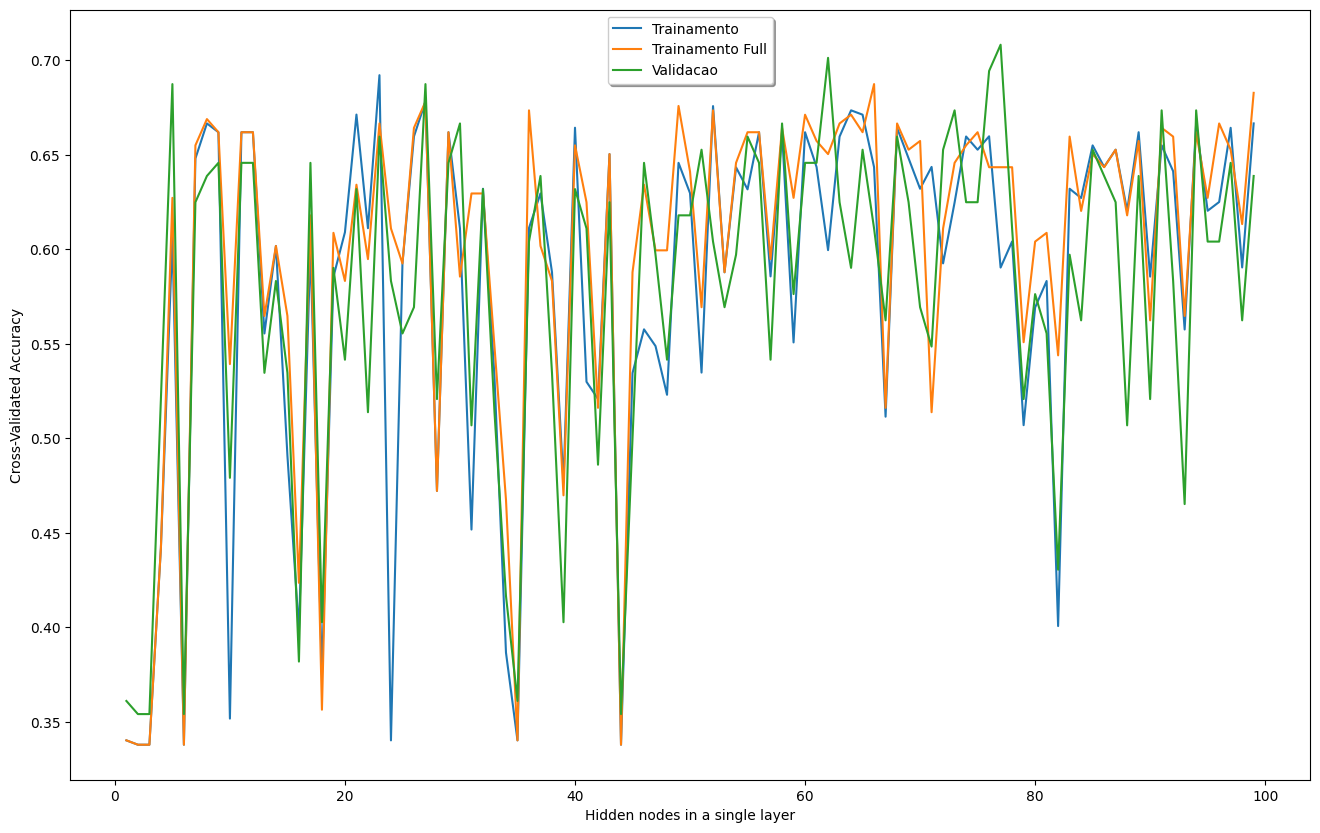

In [1]:
#
#
# REDE NEURAL MLP
# USANDO O ScikitLearn
# com early_stopping
#
import pandas
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
plt.rcParams['figure.figsize'] = [16, 10]

#definindo os nomes de cada coluna
names = ['num-pregnant', 'glucose', 'diastolic', 'triceps-skin', 'insulin', 'body-mass', 'diabetes-pedigree', 'age', 'class']

#Fazendo o carregamento dos dados diretamente do UCI Machine Learning
dataset = pandas.read_csv("pima-indians-diabetes.csv", names=names)

print("Primeiros dados")
print(dataset.head(5))

#divisao de dados atributos e classe
X = dataset.values[:, 0:8]
Y = dataset.values[:,8]

#usando o metodo para fazer uma unica divisao dos dados
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.25, random_state = 10)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state = 10)

k_scores_train = []
k_scores_train_full = []
k_scores_valid = []

# use iteração para calcular diferentes kernels em modelos e, em seguida, retorne a precisão média com base na validação cruzada
for k in range(1,100): #10, 10
      clf = MLPClassifier(hidden_layer_sizes=(k,), random_state=10, early_stopping=True, n_iter_no_change=5)
      scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
      k_scores_train.append(scores.mean())
      clf.fit(X_train, y_train)
      k_scores_train_full.append(clf.score(X_train, y_train))
      k_scores_valid.append(clf.score(X_valid, y_valid))

# plot to see clearly
plt.plot(range(1,100), k_scores_train)
plt.plot(range(1,100), k_scores_train_full)
plt.plot(range(1,100), k_scores_valid)
plt.legend(('Trainamento', 'Trainamento Full', 'Validacao'),
           loc='upper center', shadow=True)
plt.xlabel('Hidden nodes in a single layer')
plt.ylabel('Cross-Validated Accuracy')
plt.show()